<a href="https://colab.research.google.com/github/MarceloGilos/titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORTANDO TODAS AS BIBLIOTECAS NECESSARIAS PARA O CÓDIGO
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
#IMPORTANDO A BASE DE DADOS
url = "https://raw.githubusercontent.com/MarceloGilos/titanic/main/train.csv"

dados = pd.read_csv(url)

In [2]:
#MOSTRANDO A  "CABEÇA" DO BANCO DE DADOS
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#TRADUZINDO A TABELA PARA FACILITAR A MANIPULAÇÃO E O ENTENDIMENTO
mapa = {
    "PassengerID" : "PassageiroID",
    "Survived" : "Sobrevivente",
    "Pclass" : "Classe",
    "Name" : "Nome",
    "Sex" : "Sexo",
    "SibSp" : "SibSp"
}
#MUDADO TIPO DE DADOS PARA ANALISE
dados = dados.rename(columns = mapa)
dados.replace(to_replace = "male",  
                 value = 1,  
                  inplace = True)
dados.replace(to_replace = "female",  
                 value = 0,  
                  inplace = True)
dados.fillna(0, inplace=True)  
dados["Age"]




0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [4]:
#SEPARANDO OS DADOS X E Y
x = dados[["Sexo", "Age"]]
y = dados["Sobrevivente"]

x.head()

                                                                           

,Sexo,Age
0,1,22.0
1,0,38.0
2,0,26.0
3,0,35.0
4,1,35.0


In [5]:
dados.shape

(891, 12)

In [6]:
#SEPARANDO A TABELA QUE SERA USADO APRA TREINO E PARA 
SEED = 20
treino_x = x[:668]
treino_y = y[:668]
teste_x = x[668:]
teste_y = y[668:]

In [7]:
#USANDO LINEARsvc PARA ENSINAR A MAQUINA E TESTAR
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos %d elementos" % (len(treino_x), len(teste_x)))
model = LinearSVC()
model.fit(treino_x,treino_y)
previsao = model.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y,previsao)
print("A taxa de acerto foi de %.2f" % (taxa_de_acerto*100))

Treinaremos com 668 elementos e testaremos 223 elementos
A taxa de acerto foi de 80.72


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [8]:
# TREINANDO DUMMY
dummy_stratified = DummyClassifier() 
dummy_stratified.fit(treino_x, treino_y)

# TESTANDO DUMMY
previsoes2 = dummy_stratified.predict(teste_x)

# ACURACIA DUMMY
acuracia2 = accuracy_score(teste_y, previsoes2)*100
print("Acuracia Dummy: %.2f" % acuracia2)

Acuracia Dummy: 63.68


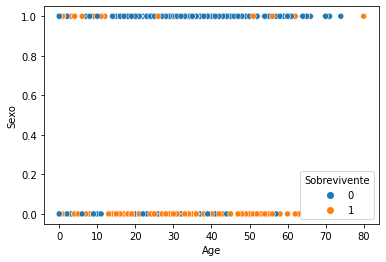

In [9]:
sns.scatterplot(x = "Age", y = "Sexo" , hue = "Sobrevivente", data=dados)

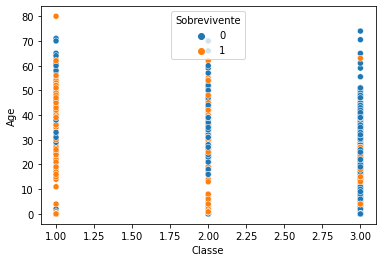

In [10]:
sns.scatterplot(x="Classe",y="Age",hue="Sobrevivente", data=dados)

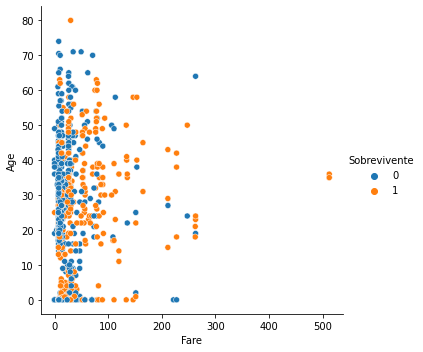

In [11]:
sns.relplot(x="Fare",y="Age",hue="Sobrevivente", data=dados)

In [12]:
xmin=teste_x.Sexo.min()
xmax=teste_x.Sexo.max()
ymin=teste_x.Age.min()
ymax=teste_x.Age.max()
print(xmin,xmax)
print(ymin,ymax)

0 1
0.0 70.5


In [13]:
pixel=100
eixox=np.arange(xmin,xmax,(xmax-xmin)/pixel)
eixoy=np.arange(ymin,ymax,(ymax-ymin)/pixel)
xx,yy=np.meshgrid(eixox,eixoy)
pontos=np.c_[xx.ravel(),yy.ravel()]
pontos

array([[0.0000e+00, 0.0000e+00],
       [1.0000e-02, 0.0000e+00],
       [2.0000e-02, 0.0000e+00],
       ...,
       [9.7000e-01, 6.9795e+01],
       [9.8000e-01, 6.9795e+01],
       [9.9000e-01, 6.9795e+01]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


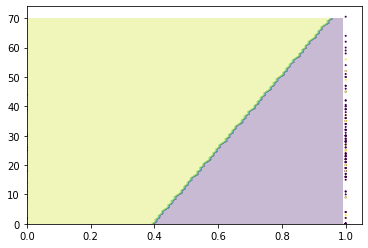

In [14]:
z=model.predict(pontos)
z=z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(teste_x.Sexo,teste_x.Age,c=teste_y,s=1)